In [23]:
import warnings
warnings.filterwarnings('ignore')
from google.cloud import bigquery
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (16, 20)
import pandas_profiling
import cartopy.crs as ccrs
import pandas as pd
# https://github.com/SohierDane/BigQuery_Helper
from bq_helper import BigQueryHelper



bq_helper requires the creation of one BigQueryHelper object per dataset. Let's make one now. We'll need to pass it two arguments:

  -  The name of the BigQuery project, which on Kaggle should always be bigquery-public-data
  -  The name of the dataset, which can be found in the dataset description.



In [24]:
# Use  bq_helper to create a BigQueryHelper object
noaa_gsod = BigQueryHelper(active_project= "bigquery-public-data", 
                              dataset_name= "noaa_gsod")


The first thing I like to do with a dataset is to list all of the tables. 

In [25]:
noaa_gsod.list_tables()

['gsod1929',
 'gsod1930',
 'gsod1931',
 'gsod1932',
 'gsod1933',
 'gsod1934',
 'gsod1935',
 'gsod1936',
 'gsod1937',
 'gsod1938',
 'gsod1939',
 'gsod1940',
 'gsod1941',
 'gsod1942',
 'gsod1943',
 'gsod1944',
 'gsod1945',
 'gsod1946',
 'gsod1947',
 'gsod1948',
 'gsod1949',
 'gsod1950',
 'gsod1951',
 'gsod1952',
 'gsod1953',
 'gsod1954',
 'gsod1955',
 'gsod1956',
 'gsod1957',
 'gsod1958',
 'gsod1959',
 'gsod1960',
 'gsod1961',
 'gsod1962',
 'gsod1963',
 'gsod1964',
 'gsod1965',
 'gsod1966',
 'gsod1967',
 'gsod1968',
 'gsod1969',
 'gsod1970',
 'gsod1971',
 'gsod1972',
 'gsod1973',
 'gsod1974',
 'gsod1975',
 'gsod1976',
 'gsod1977',
 'gsod1978',
 'gsod1979',
 'gsod1980',
 'gsod1981',
 'gsod1982',
 'gsod1983',
 'gsod1984',
 'gsod1985',
 'gsod1986',
 'gsod1987',
 'gsod1988',
 'gsod1989',
 'gsod1990',
 'gsod1991',
 'gsod1992',
 'gsod1993',
 'gsod1994',
 'gsod1995',
 'gsod1996',
 'gsod1997',
 'gsod1998',
 'gsod1999',
 'gsod2000',
 'gsod2001',
 'gsod2002',
 'gsod2003',
 'gsod2004',
 'gsod2005',

## Stations

I will start my basic EDA with the `stations` table.  Let's get some details about its columns by viewing the table schema. 

In [26]:
noaa_gsod.table_schema("stations")

[SchemaField('usaf', 'STRING', 'NULLABLE', '', ()),
 SchemaField('wban', 'STRING', 'NULLABLE', '', ()),
 SchemaField('name', 'STRING', 'NULLABLE', '', ()),
 SchemaField('country', 'STRING', 'NULLABLE', '', ()),
 SchemaField('state', 'STRING', 'NULLABLE', '', ()),
 SchemaField('call', 'STRING', 'NULLABLE', '', ()),
 SchemaField('lat', 'FLOAT', 'NULLABLE', '', ()),
 SchemaField('lon', 'FLOAT', 'NULLABLE', '', ()),
 SchemaField('elev', 'STRING', 'NULLABLE', '', ()),
 SchemaField('begin', 'STRING', 'NULLABLE', '', ()),
 SchemaField('end', 'STRING', 'NULLABLE', '', ())]

In [27]:
%%time
noaa_gsod.head("stations", num_rows=20)

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 811 ms


,usaf,wban,name,country,state,call,lat,lon,elev,begin,end
0,007026,99999,WXPOD 7026,AF,,,0.000,0.000,+7026.0,20140711,20170822
1,007070,99999,WXPOD 7070,AF,,,0.000,0.000,+7070.0,20140923,20150926
2,010010,99999,JAN MAYEN(NOR-NAVY),NO,,ENJA,70.933,-8.667,+0009.0,19310101,20180413
3,010014,99999,SORSTOKKEN,NO,,ENSO,59.792,5.341,+0048.8,19861120,20180413
4,010015,99999,BRINGELAND,NO,,,61.383,5.867,+0327.0,19870117,20111020
5,010016,99999,RORVIK/RYUM,NO,,,64.850,11.233,+0014.0,19870116,19910806
6,010017,99999,FRIGG,NO,,ENFR,59.980,2.250,+0048.0,19880320,20050228
7,010050,99999,ISFJORD RADIO,SV,,,78.067,13.633,+0009.0,19310103,20140523
8,010060,99999,EDGEOYA,NO,,,78.250,22.817,+0014.0,19730101,20180413
9,010070,99999,NY-ALESUND,SV,,,78.917,11.933,+0007.7,19730106,20180413


## Checking the size of a query before running it

Now that we have an idea of what data in `stations` looks like, we are ready to write a simple query. We should check how much memory it will scan. It is a good habit to get into for when you are working with large datasets hosted on BigQuery. 

In [28]:
QUERY = """SELECT name, country, lat, lon, elev, begin, end
            FROM `bigquery-public-data.noaa_gsod.stations` """

In [29]:
noaa_gsod.estimate_query_size(QUERY)

BadRequest: 400 POST https://dp.kaggle.net/bigquery/v2/projects/kaggle-161607/jobs: Syntax error: Expected keyword FROM but got keyword END at [1:46]

The error above is due to the fact that `end` is a reversed keyword and one of columns in the table is named `end`. Because the renaming of the column is not possible, we will need to wrap the offending identifier in backticks. **

In [30]:
QUERY = """SELECT name, country, lat, lon, elev, begin, `end`
            FROM `bigquery-public-data.noaa_gsod.stations` """
noaa_gsod.estimate_query_size(QUERY)

0.0017601381987333298

Running this query will take around `1.80 MB`. (The query size is returned in gigabytes.)
> Important: When you're writing your query, make sure that the name of the table (next to FROM) is in back ticks (`), not single quotes ('). The reason for this is that the names of BigQuery tables contain periods in them, which in SQL are special characters. Putting the table name in back ticks protects the table name, so it's treated as a single string instead of being run as code.

## Running the query

Now that we've made sure that we are not scanning several terabytes of data, we are ready to actually run our query. 

We have two methods available to help you do this:

   -  `BigQueryHelper.query_to_pandas(query)`: This method takes a query and returns a Pandas dataframe.
   - `BigQueryHelper.query_to_pandas_safe(query, max_gb_scanned=1)`: This method takes a query and returns a Pandas dataframe only if the size of the query is less than the upperSizeLimit (1 gigabyte by default).


In [31]:
stations = noaa_gsod.query_to_pandas_safe(QUERY, max_gb_scanned=0.1)

In [32]:
stations.head()

,name,country,lat,lon,elev,begin,end
0,WXPOD 7026,AF,0.000,0.000,+7026.0,20140711,20170822
1,WXPOD 7070,AF,0.000,0.000,+7070.0,20140923,20150926
2,BRINGELAND,NO,61.383,5.867,+0327.0,19870117,20111020
3,RORVIK/RYUM,NO,64.850,11.233,+0014.0,19870116,19910806
4,FRIGG,NO,59.980,2.250,+0048.0,19880320,20050228


Now that we have a Pandas dataframe, it is time to dive in our data analysis.
Let's Generate descriptive statistics that summarize our dataframe.

In [33]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30050 entries, 0 to 30049
Data columns (total 7 columns):
name       30050 non-null object
country    30050 non-null object
lat        28766 non-null float64
lon        28765 non-null float64
elev       30050 non-null object
begin      30050 non-null object
end        30050 non-null object
dtypes: float64(2), object(5)
memory usage: 1.6+ MB


In [34]:
stations.describe(include=["O"])

,name,country,elev,begin,end
count,30050,30050,30050,30050,30050
unique,26712,249,5270,7435,7377
top,,US,,19730101,20180413
freq,789,7513,1378,2617,10503


In [35]:
stations.describe()

,lat,lon
count,28766.000000,28765.000000
mean,30.676563,-3.666662
std,28.732024,87.373945
min,-90.000000,-179.983000
25%,20.950000,-82.883000
50%,38.910000,5.202000
75%,49.662750,58.917000
max,89.370000,179.750000


Let's use [pandas-profiling package](https://github.com/pandas-profiling/pandas-profiling) to generate profile reports from stations dataframe. 

In [36]:
pandas_profiling.ProfileReport(stations)

Number of variables,7
Number of observations,30050
Total Missing (%),1.2%
Total size in memory,1.6 MiB
Average record size in memory,56.0 B
Numeric,2
Categorical,5
Boolean,0
Date,0
Text (Unique),0
Rejected,0



## Maps with Layers

- Geopandas provides a high-level interface to the matplotlib library for making maps.
- Mapping shapes is as easy as using the plot() method on a GeoSeries or GeoDataFrame.

Let's overlay stations over world GeoDataFrame to better visualize theier geographical locations.


 Before combining maps, however, remember to always ensure they share a common CRS (so they will allign).

In [37]:
from shapely.geometry import Point
import geopandas as gpd

In [38]:
# Geopandas = pandas + (shapely * projection)
gdf = gpd.GeoDataFrame(stations, geometry=None)\
         .set_geometry([Point(r.lon, r.lat) for _, r in stations.iterrows()],
                       crs={"init": "EPSG:4326"})

In [39]:
gdf.head()

,name,country,lat,lon,elev,begin,end,geometry
0,WXPOD 7026,AF,0.000,0.000,+7026.0,20140711,20170822,POINT (0 0)
1,WXPOD 7070,AF,0.000,0.000,+7070.0,20140923,20150926,POINT (0 0)
2,BRINGELAND,NO,61.383,5.867,+0327.0,19870117,20111020,POINT (5.867 61.383)
3,RORVIK/RYUM,NO,64.850,11.233,+0014.0,19870116,19910806,POINT (11.233 64.84999999999999)
4,FRIGG,NO,59.980,2.250,+0048.0,19880320,20050228,POINT (2.25 59.98)


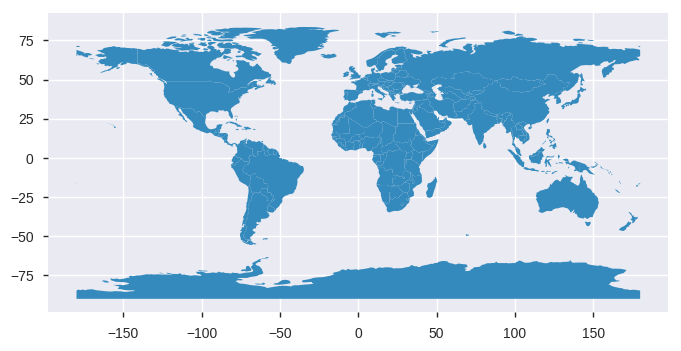

In [63]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot();

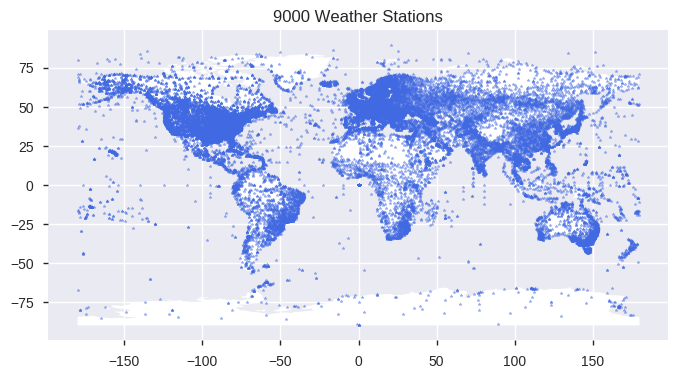

In [64]:
# Now we can overlay stations over country outlines
base = world.plot(color='white')
plt.title('9000 Weather Stations')
gdf.plot(ax=base, marker='*', color='royalblue', markersize=5, alpha=0.5);

**And Yes, there is quite a lot of stations in the United States!**